In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Importing the inconsistent data set

Creating a variable to store the dataframe for further use

In [2]:
cars=pd.read_csv(r"C:\Users\Allidi chethan\OneDrive\Desktop\Cars_Dataset\cars_unclean.csv")


Now the variable cars contain the dataframe

Inspect the data frame 

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0 hp,3504,12.0,70,United States,chevrolet chevelle malibu
1,15.0,8,350.0,165.0 hp,3693,11.5,70,United States,buick skylark 320
2,18.0,8,318.0,150.0 hp,3436,11.0,70,United States,plymouth satellite
3,16.0,8,304.0,150.0 hp,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0 hp,3449,10.5,70,usa,FORD TORINO


In [4]:
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
324,12.0,8,429.0,198.0 hp,4952,11.5,73,usa,mercury marquis brougham
325,27.0,4,101.0,83.0 hp,2202,15.3,76,europe,renault 12tl
326,17.0,6,250.0,100.0 hp,3329,15.5,71,usa,chevrolet chevelle malibu
327,14.5,8,351.0,152.0 hp,4215,12.8,76,usa,ford gran torino
328,25.0,6,181.0,110.0 hp,2945,16.4,82,usa,buick century limited


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           329 non-null    float64
 1   cylinders     329 non-null    int64  
 2   displacement  329 non-null    float64
 3   horsepower    329 non-null    object 
 4   weight        329 non-null    int64  
 5   acceleration  329 non-null    float64
 6   model year    329 non-null    int64  
 7   origin        329 non-null    object 
 8   name          329 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 23.3+ KB


In [6]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,21.655199,5.802432,217.004559,3229.082067,15.400000,104.495441
std,7.294651,1.719825,104.719009,1376.306985,2.922756,232.498690
min,0.060606,4.000000,68.000000,1800.000000,8.000000,70.000000
25%,16.000000,4.000000,121.000000,2464.000000,13.500000,73.000000
50%,20.200000,6.000000,200.000000,3102.000000,15.400000,76.000000
75%,26.000000,8.000000,305.000000,3821.000000,17.000000,79.000000
max,44.300000,8.000000,455.000000,23000.000000,24.800000,1973.000000


By looking into column names I see the name "model year" the column name has space between them 

* Firstly i need to replace the column name 

* Syntax= variable.rename({old_column_name:new_column_name},inplace=True)

In [7]:
cars.rename(columns={"model year":"model_year"},inplace=True)

In [8]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0 hp,3504,12.0,70,United States,chevrolet chevelle malibu
1,15.0,8,350.0,165.0 hp,3693,11.5,70,United States,buick skylark 320
2,18.0,8,318.0,150.0 hp,3436,11.0,70,United States,plymouth satellite
3,16.0,8,304.0,150.0 hp,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0 hp,3449,10.5,70,usa,FORD TORINO


Now the column name is changed

Now by seeing origin column all the data about countries is in short formate but in some columns the data about counutries is in long format so we need to replace it with short fromat

* syntax== cars.origin.replace("Old_Value","New_Value",inplace=True)

In [9]:
cars.origin.replace("United States","usa",inplace=True)

In [10]:
cars.origin.head() #Now the data is changed

0    usa
1    usa
2    usa
3    usa
4    usa
Name: origin, dtype: object

* By seeing the DataFrame there are string type float type and integer type So Check all the data types once

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           329 non-null    float64
 1   cylinders     329 non-null    int64  
 2   displacement  329 non-null    float64
 3   horsepower    329 non-null    object 
 4   weight        329 non-null    int64  
 5   acceleration  329 non-null    float64
 6   model_year    329 non-null    int64  
 7   origin        329 non-null    object 
 8   name          329 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 23.3+ KB


**By looking into info of the dataframe i found a mistake that the "horsepower" column is in object datatype by it should be in float data type 

**If we try to convert that into float data type it will give you an error because it is like "130.0 hp" the hp will not convert in float so remove "hp" with white spaces first

## Check for white spaces

In [12]:
cars.loc[0,"horsepower"]

'130.0 hp'

by looking the above output i conformed that there are one white space before "hp"

* Remove the hp with white spaces

* Syntax==cars.horsepower.str.replace(" hp","")

In [13]:
cars["horsepower"]=cars.horsepower.str.replace(" hp","")

Once again check the horsepower column

In [14]:
cars.loc[0,"horsepower"]

'130.0'

Inspect the horsepower column once again 

In [15]:
pd.options.display.max_rows=200

In [16]:
cars.horsepower.value_counts(ascending=True)

horsepower
158.0             1
137.0             1
167.0             1
107.0             1
230.0             1
49.0              1
91.0              1
148.0             1
102.0             1
58.0              1
96.0              1
208.0             1
149.0             1
66.0              1
68.0              1
103.0             1
133.0             1
138.0             1
135.0             1
142.0             1
77.0              1
62.0              1
64.0              1
89.0              1
54.0              1
82.0              1
220.0             1
113.0             1
200.0             1
210.0             1
193.0             1
153.0             2
65.0              2
139.0             2
97.0              2
46.0              2
87.0              2
52.0              2
152.0             2
79.0              2
81.0              2
129.0             2
98.0              2
60.0              2
69.0              2
74.0              2
155.0             2
120.0             3
125.0             3
225.0    

By seeing the about output carfully i found "Not available" and it is string and again we cannot convert it into float datatype so we need to create real missing values NaN 

* Syntax = cars.horsepower.replace("old_value","New_Value",inplace=True)

In [17]:
cars.horsepower.replace("Not available",np.nan,inplace=True)

In [18]:
cars.horsepower.value_counts(dropna=False)

horsepower
150.0    22
90.0     19
110.0    19
100.0    16
88.0     14
105.0    12
95.0     10
85.0      9
70.0      8
80.0      7
145.0     7
140.0     7
NaN       6
170.0     6
75.0      6
84.0      6
78.0      6
175.0     5
180.0     5
72.0      5
86.0      5
130.0     5
83.0      5
71.0      5
115.0     5
165.0     4
67.0      4
92.0      4
76.0      4
125.0     3
112.0     3
120.0     3
48.0      3
63.0      3
198.0     3
215.0     3
225.0     3
190.0     3
160.0     3
97.0      2
46.0      2
52.0      2
152.0     2
74.0      2
79.0      2
81.0      2
98.0      2
129.0     2
139.0     2
60.0      2
87.0      2
65.0      2
69.0      2
153.0     2
155.0     2
77.0      1
68.0      1
103.0     1
133.0     1
64.0      1
138.0     1
135.0     1
62.0      1
66.0      1
142.0     1
89.0      1
167.0     1
149.0     1
137.0     1
220.0     1
113.0     1
200.0     1
210.0     1
193.0     1
54.0      1
208.0     1
158.0     1
96.0      1
107.0     1
230.0     1
49.0      1
91.0      1
148.0

Now the real missing values is created and good to convert to float datatype

* syntax == variable.column_name.astype("data_type")

In [19]:
cars["horsepower"]=cars.horsepower.astype("float")

In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           329 non-null    float64
 1   cylinders     329 non-null    int64  
 2   displacement  329 non-null    float64
 3   horsepower    323 non-null    float64
 4   weight        329 non-null    int64  
 5   acceleration  329 non-null    float64
 6   model_year    329 non-null    int64  
 7   origin        329 non-null    object 
 8   name          329 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 23.3+ KB


Now look into "horsepower" datatype it is float

## Check for other inconsistencies in the data frame

In [21]:
cars.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,FORD TORINO
5,15.0,8,429.0,198.0,4341,10.0,70,usa,FORD GALAXIE 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


By seeing the above data some time i found the mistakes in names column (All the names are in small letters by some of them is in Captial letters)

* So i came with an conclusion that we need to convert all names to small letters

* Syntax== variable[col_name]=variable.col_name.str.operatioin()

In [22]:
cars["name"]=cars.name.str.lower()

Now check the names columns

** check the single name for once

In [23]:
cars.name.head(10) #All names are in small letters

0      chevrolet chevelle malibu 
1              buick skylark 320 
2             plymouth satellite 
3                  amc rebel sst 
4                    ford torino 
5               ford galaxie 500 
6               chevrolet impala 
7              plymouth fury iii 
8               pontiac catalina 
9             amc ambassador dpl 
Name: name, dtype: object

In [24]:
cars.loc[0,"name"]

'  chevrolet chevelle malibu '

If you look info the name carefully there are white spaces before and after name so we need to remove that spaces

* Syntax = cars.name=cars.name.str.strip()

In [25]:
cars.name=cars.name.str.strip()

In [26]:
cars.loc[0,"name"]

'chevrolet chevelle malibu'

Now the "name" column is perfect

## Check for the mistakes in another column

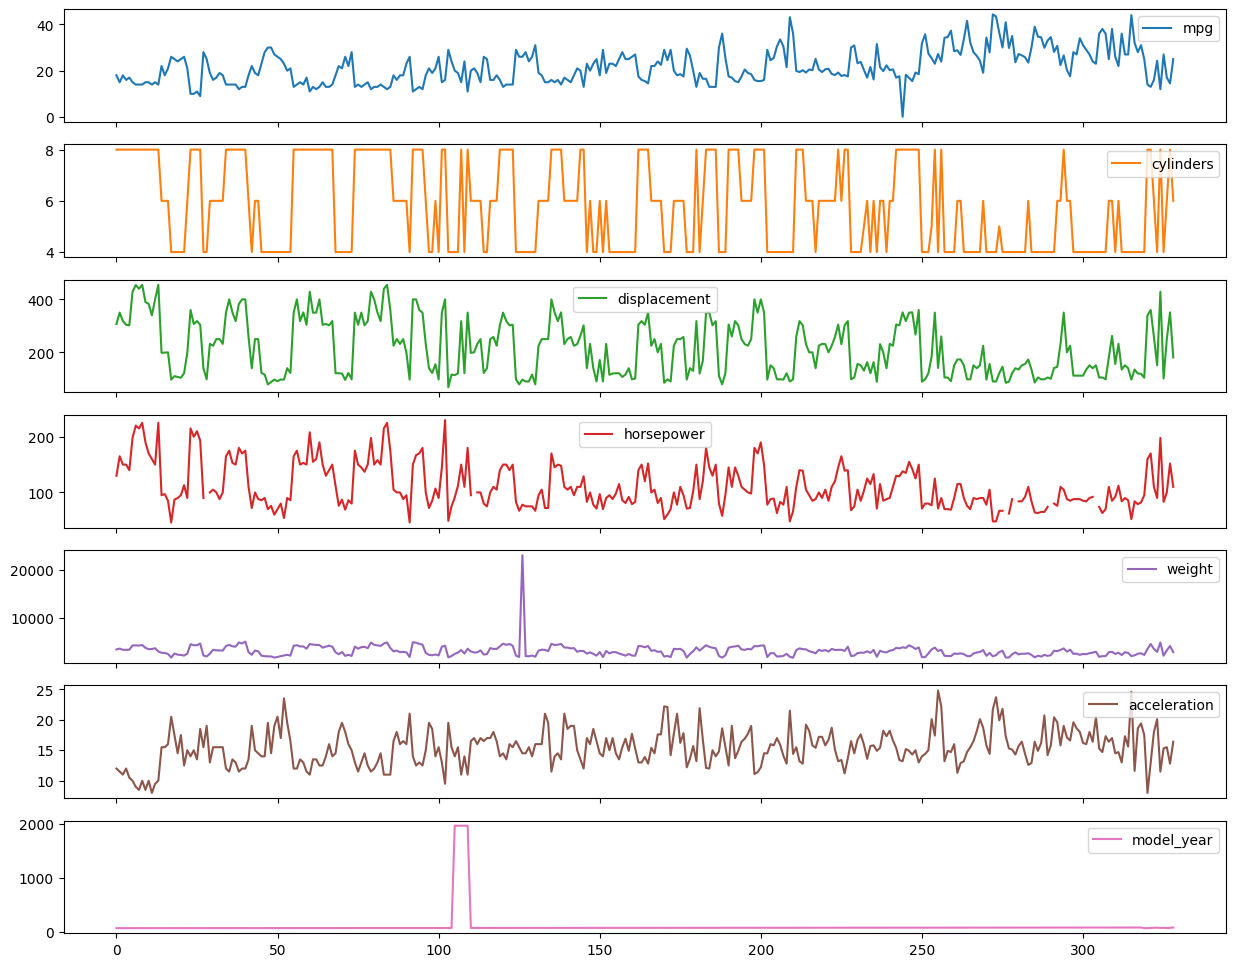

In [27]:
cars.plot(subplots=True,figsize=(15,12))
plt.show()

* After some time i found another mistake in "model_year" column (all the years in short form but some of ther are in full form 1973 we need to change the data into 73 

* see the last graph there are some outliers in "model_year" column and "weight" column

* for better understanding analyze the frequency of "model_year" column

In [28]:
cars.model_year.value_counts(ascending=True)

model_year
1973     5
80      17
81      17
74      22
77      22
72      23
82      23
71      25
75      26
79      27
78      28
70      29
76      32
73      33
Name: count, dtype: int64

* If you see the above values there are one year named 1973 we need to overwrite with 73

* Syntax = cars.model_year.replace(1973,73,inplace=True)

In [29]:
cars.model_year.replace(1973,73,inplace=True)

Now check the frequency of that column and plot it

In [30]:
cars.model_year.value_counts()

model_year
73    38
76    32
70    29
78    28
79    27
75    26
71    25
72    23
82    23
74    22
77    22
80    17
81    17
Name: count, dtype: int64

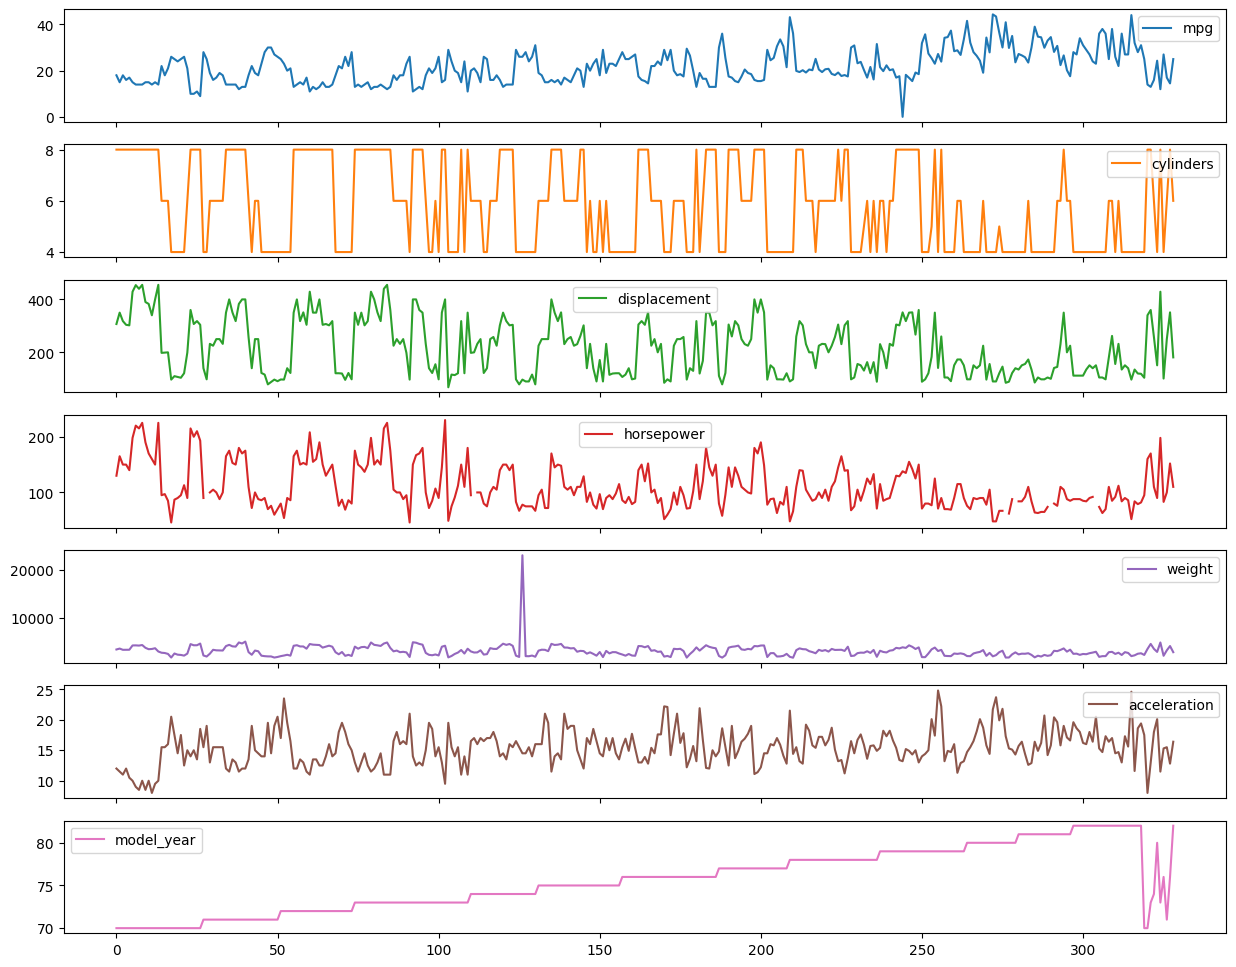

In [31]:
cars.plot(subplots=True,figsize=(15,12))
plt.show()

Compare both graphs

* The "weight" column looking different 

In [32]:
cars.loc[cars.weight.idxmax()]

mpg                   26.0
cylinders                4
displacement          97.0
horsepower            78.0
weight               23000
acceleration          14.5
model_year              74
origin              europe
name            opel manta
Name: 126, dtype: object

* By looking into these details 23000 is not a correct value it must be a extra zero so replace the value by 2300

* syntax = cars.loc[126,"weight"]=2300

In [33]:
cars.loc[126,"weight"]=2300

In [34]:
cars.loc[126]

mpg                   26.0
cylinders                4
displacement          97.0
horsepower            78.0
weight                2300
acceleration          14.5
model_year              74
origin              europe
name            opel manta
Name: 126, dtype: object

Now the value is changed 

plot the dataframe and see the results

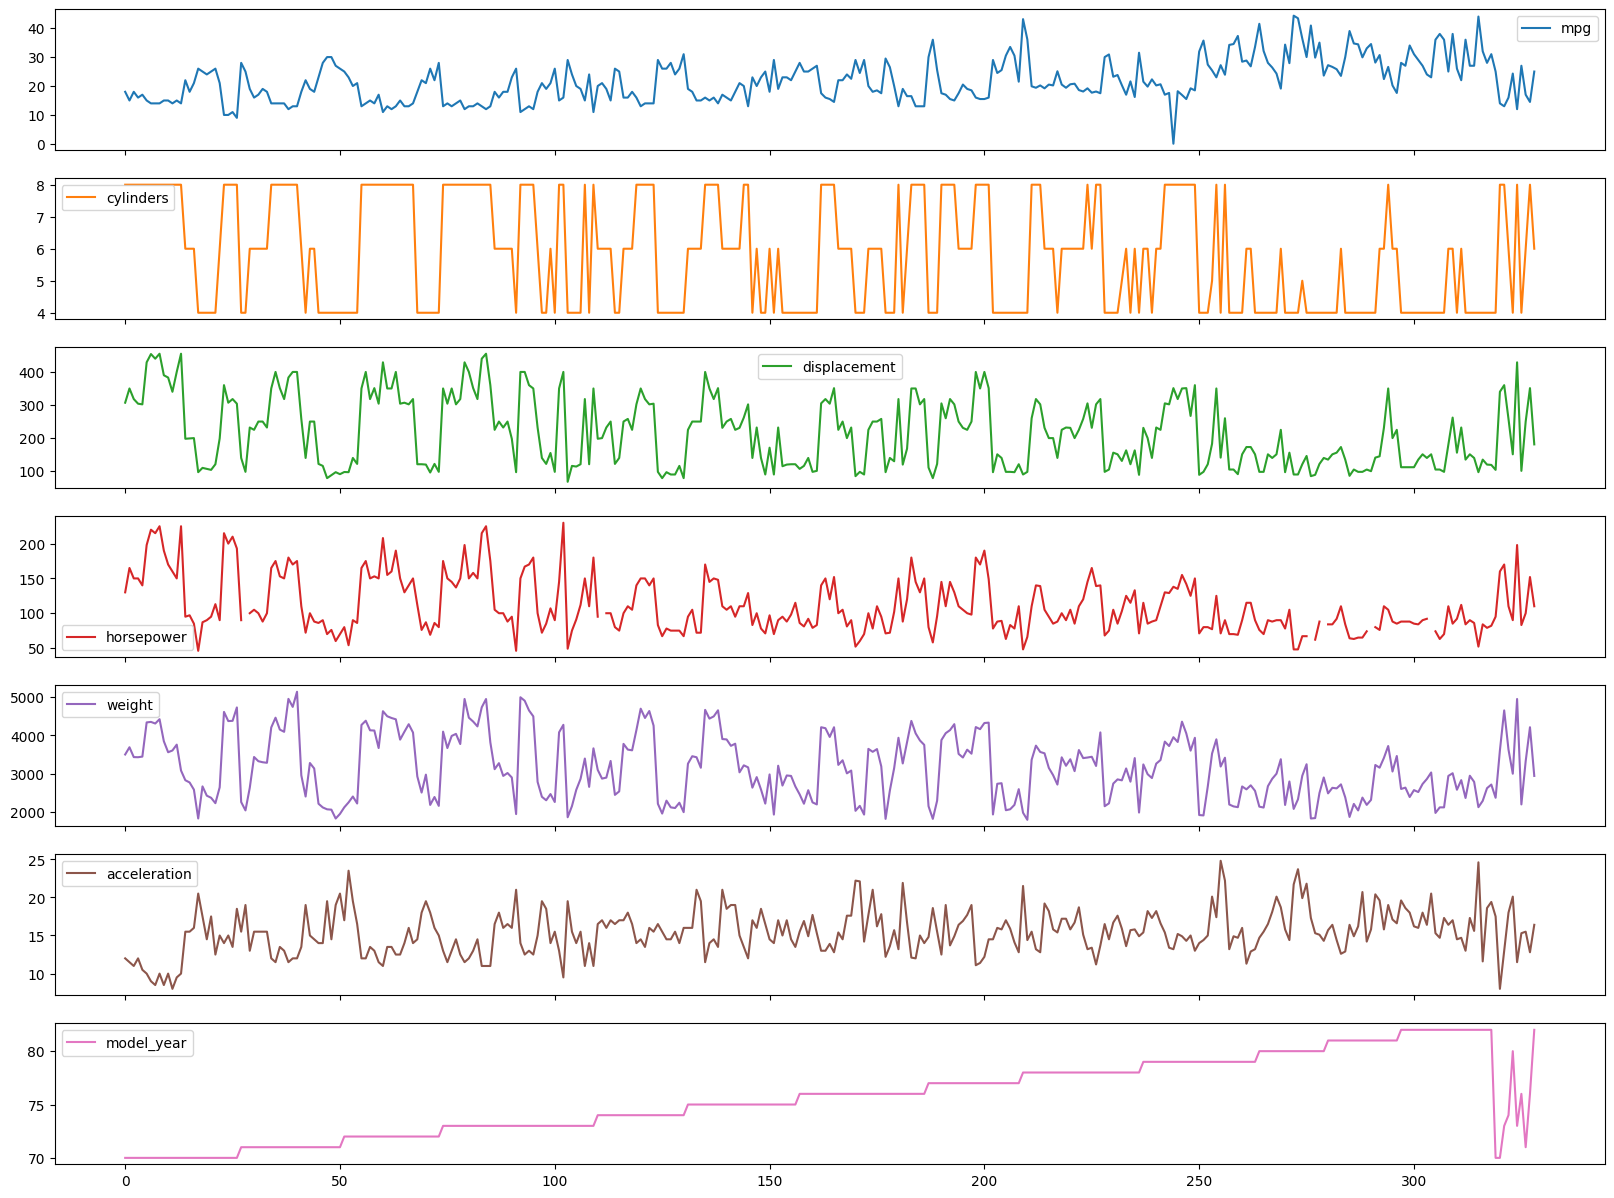

In [35]:
cars.plot(subplots=True,figsize=(20,15))
plt.show()

* If you see the graph of mpg there are one perticular value is near to zero normally the mpg should not be near to zero 

In [36]:
cars.mpg.min()

0.0606060606060606

* see the above value it is not correct 

* mpg is miles per gallon but this value is looking like gallon per mile so convert the value to miles per gallon  

* formula for miles per gallon is =1/gallon per mile

In [37]:
cars.loc[cars.mpg.idxmin()]

mpg                          0.060606
cylinders                           8
displacement                    351.0
horsepower                      138.0
weight                           3955
acceleration                     13.2
model_year                         79
origin                            usa
name            mercury grand marquis
Name: 244, dtype: object

In [38]:
cars.loc[244,"mpg"]=1/cars.loc[244,"mpg"]

In [39]:
cars.loc[244]

mpg                              16.5
cylinders                           8
displacement                    351.0
horsepower                      138.0
weight                           3955
acceleration                     13.2
model_year                         79
origin                            usa
name            mercury grand marquis
Name: 244, dtype: object

Now the outlier for mpg column is fixed

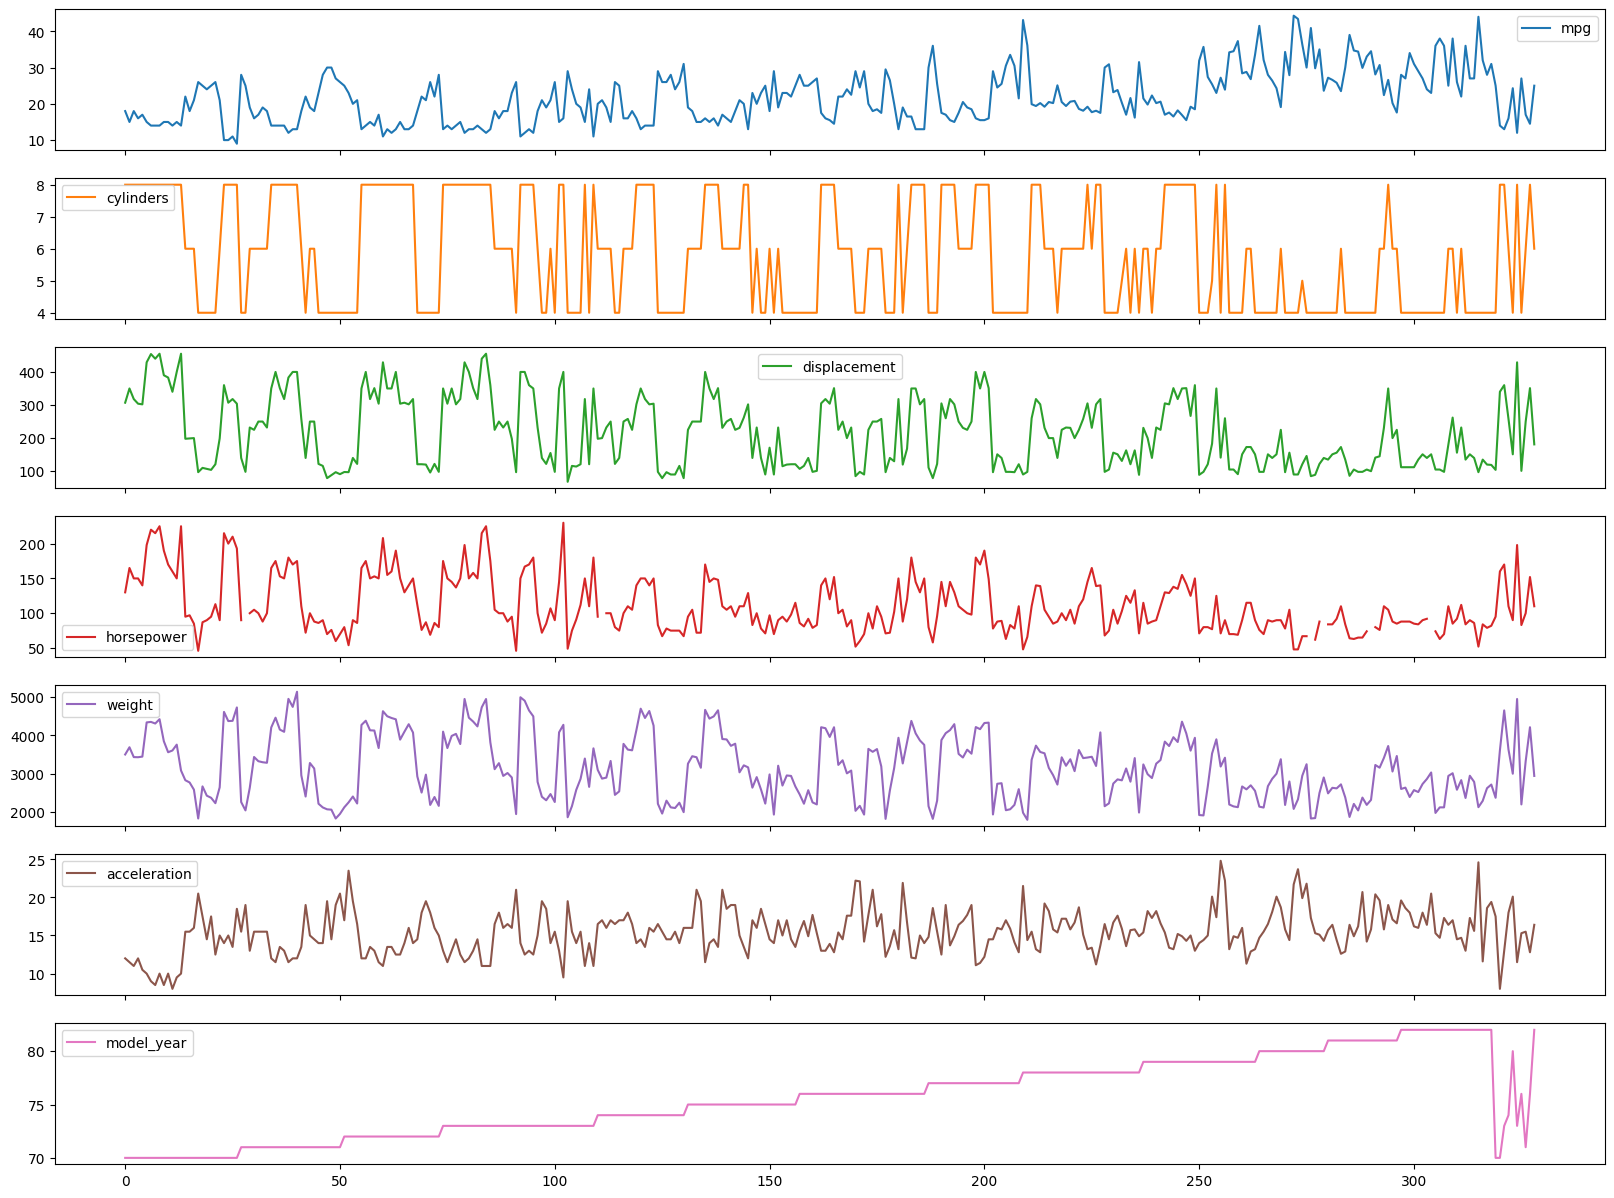

In [40]:
cars.plot(subplots=True,figsize=(20,15))
plt.show()

Now the most important part is Check for null values

In [41]:
cars.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

There are 6 null value rows found in horsepower column

* But for cars data the horse power is more important so remove the missing value rows from the data frame

* syntax= variable.dropna(inplace=True)

In [42]:
cars.dropna(inplace=True)

Check for the null values again

In [43]:
cars.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

* By seeing the above output we conform that there is no null values

## Now lets see duplicates

In [44]:
cars.duplicated().sum()

10

* There are 10 duplicate row found

In [45]:
cars.loc[cars.duplicated(keep=False)].sort_values("name")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
323,24.3,4,151.0,90.0,3003,20.1,80,usa,amc concord
268,24.3,4,151.0,90.0,3003,20.1,80,usa,amc concord
322,16.0,6,258.0,110.0,3632,18.0,74,usa,amc matador
117,16.0,6,258.0,110.0,3632,18.0,74,usa,amc matador
308,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited
328,25.0,6,181.0,110.0,2945,16.4,82,usa,buick century limited
31,17.0,6,250.0,100.0,3329,15.5,71,usa,chevrolet chevelle malibu
326,17.0,6,250.0,100.0,3329,15.5,71,usa,chevrolet chevelle malibu
165,14.5,8,351.0,152.0,4215,12.8,76,usa,ford gran torino
327,14.5,8,351.0,152.0,4215,12.8,76,usa,ford gran torino


* The above 10 rows are duplicated so remove the rows from data frame

* syntax= cars.drop_duplicates(keep="first",inplace=True)

In [46]:
cars.shape # Before droping duplicates

(323, 9)

In [47]:
cars.drop_duplicates(keep="first",inplace=True)

In [48]:
cars.shape # After droping duplicates

(313, 9)

* see theh difference the 10 rows is removed

## Now inspect the data frame

In [49]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,21.677955,5.817891,217.557508,110.686901,3168.485623,15.382109,75.610224
std,7.177136,1.721489,104.510473,39.810743,834.910924,2.908079,3.604861
min,9.000000,4.000000,68.000000,46.000000,1800.000000,8.000000,70.000000
25%,16.000000,4.000000,121.000000,83.000000,2464.000000,13.500000,73.000000
50%,20.200000,6.000000,225.000000,100.000000,3121.000000,15.300000,76.000000
75%,26.400000,8.000000,305.000000,140.000000,3821.000000,17.000000,78.000000
max,44.300000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


* In order to save memory we can change the data type of object columns which contain few unique values

* So check the object datatype columns 

* syntax= variable.describe(include="O")

In [50]:
cars.describe(include="O")

,origin,name
count,313,313
unique,2,237
top,usa,ford pinto
freq,245,5


* See the column "origin" only 2 values so we can convert into category datatype

* syntax= cars["origin"]=cars.origin.astype("category")

In [51]:
cars["origin"]=cars.origin.astype("category")

In [52]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 0 to 318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           313 non-null    float64 
 1   cylinders     313 non-null    int64   
 2   displacement  313 non-null    float64 
 3   horsepower    313 non-null    float64 
 4   weight        313 non-null    int64   
 5   acceleration  313 non-null    float64 
 6   model_year    313 non-null    int64   
 7   origin        313 non-null    category
 8   name          313 non-null    object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 22.4+ KB


The datatype of "origin" column is changed

The data cleaning of cars data set is now completed plot the cleaned data and export the data info new csv file

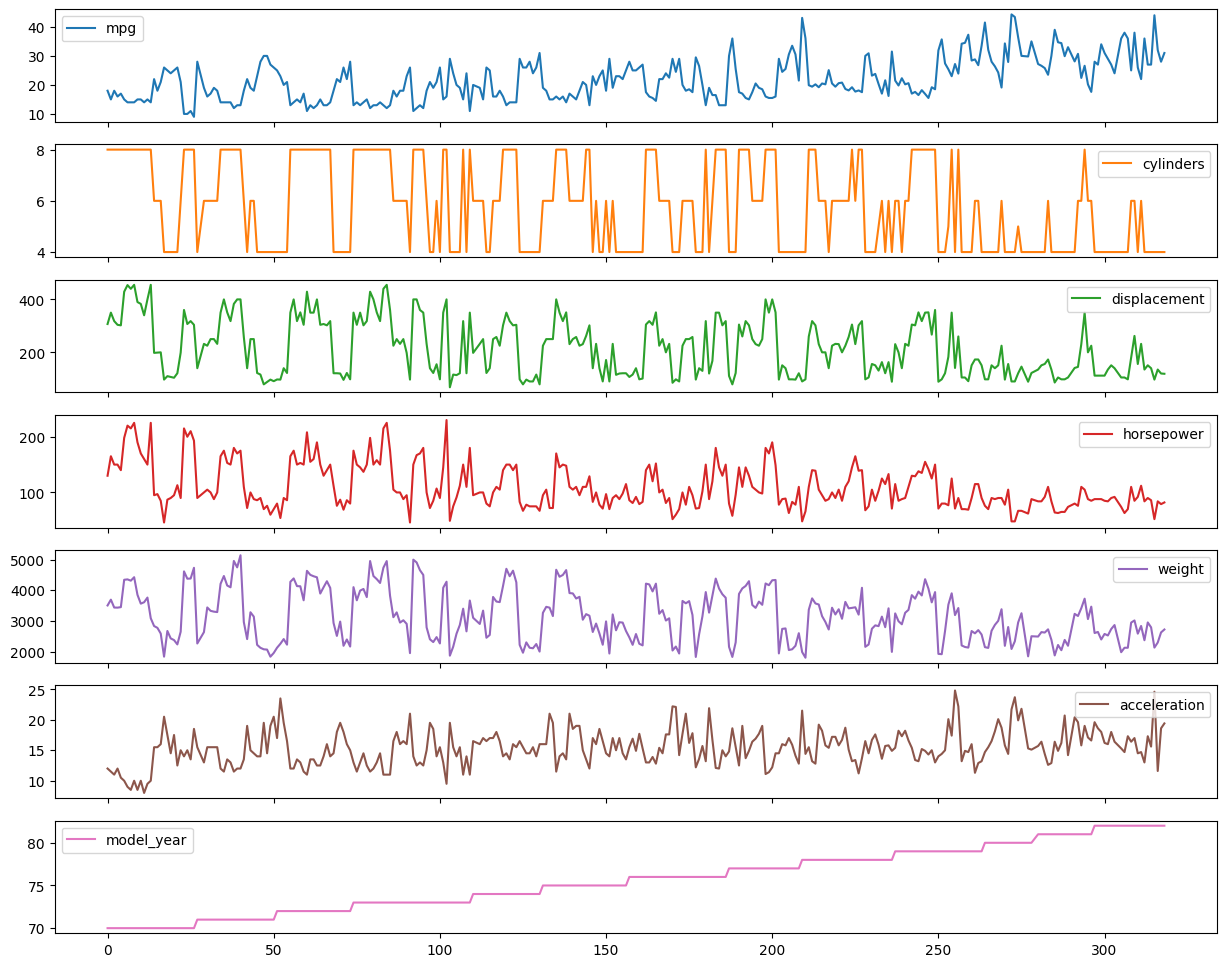

In [53]:
cars.plot(subplots=True,figsize=(15,12))
plt.show()

the graph look good and it is ready to export

# Exporting the data set 

* syntax = cars.to_csv("path")

In [54]:
cars.to_csv(r"C:\Users\Allidi chethan\OneDrive\Desktop\Cars_Dataset\cars_Clean_Dataframe.csv",index=False)

check the cleaned data set 

In [55]:
cars1=pd.read_csv(r"C:\Users\Allidi chethan\OneDrive\Desktop\Cars_Dataset\cars_Clean_Dataframe.csv")

In [56]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           313 non-null    float64
 1   cylinders     313 non-null    int64  
 2   displacement  313 non-null    float64
 3   horsepower    313 non-null    float64
 4   weight        313 non-null    int64  
 5   acceleration  313 non-null    float64
 6   model_year    313 non-null    int64  
 7   origin        313 non-null    object 
 8   name          313 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 22.1+ KB


In [57]:
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
